In [ ]:
from math import sqrt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score,mean_squared_error,precision_score,roc_auc_score, roc_curve, mean_absolute_error
#we don't need roc_auc_score, roc_curve, since they are for classifier model
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#checking the file path
import os
file_path = '/content/drive/MyDrive/train_sup.csv'
print(os.path.exists(file_path))

True


In [ ]:
#uploading data
df2 = pd.read_csv('/content/drive/MyDrive/unique_sup.csv')

In [ ]:
df2.shape

(21263, 88)

In [ ]:
pd.set_option('display.max_columns', None)
print(df2.head(1))

     H  He   Li   Be    B    C    N    O    F  Ne   Na   Mg   Al   Si    P  \
0  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  0.0  0.0  0.0  0.0  0.0   

     S   Cl  Ar    K   Ca   Sc   Ti    V   Cr   Mn   Fe   Co   Ni   Cu   Zn  \
0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   

    Ga   Ge   As   Se   Br  Kr   Rb   Sr    Y   Zr   Nb   Mo   Tc   Ru   Rh  \
0  0.0  0.0  0.0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    Pd   Ag   Cd   In   Sn   Sb   Te    I  Xe   Cs   Ba   La   Ce   Pr   Nd  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0  0.0  0.2  1.8  0.0  0.0  0.0   

   Pm   Sm   Eu   Gd   Tb   Dy   Ho   Er   Tm   Yb   Lu   Hf   Ta    W   Re  \
0   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    Os   Ir   Pt   Au   Hg   Tl   Pb   Bi  Po  At  Rn  critical_temp  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0   0   0           29.0   

          material  
0  Ba0.2La1.8Cu1O4  


In [ ]:
df = df2.dropna(axis=1, how='all')
print(df.head(1))

     H  He   Li   Be    B    C    N    O    F  Ne   Na   Mg   Al   Si    P  \
0  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  0.0  0.0  0.0  0.0  0.0   

     S   Cl  Ar    K   Ca   Sc   Ti    V   Cr   Mn   Fe   Co   Ni   Cu   Zn  \
0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   

    Ga   Ge   As   Se   Br  Kr   Rb   Sr    Y   Zr   Nb   Mo   Tc   Ru   Rh  \
0  0.0  0.0  0.0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    Pd   Ag   Cd   In   Sn   Sb   Te    I  Xe   Cs   Ba   La   Ce   Pr   Nd  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0  0.0  0.2  1.8  0.0  0.0  0.0   

   Pm   Sm   Eu   Gd   Tb   Dy   Ho   Er   Tm   Yb   Lu   Hf   Ta    W   Re  \
0   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    Os   Ir   Pt   Au   Hg   Tl   Pb   Bi  Po  At  Rn  critical_temp  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0   0   0           29.0   

          material  
0  Ba0.2La1.8Cu1O4  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 88 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   H              21263 non-null  float64
 1   He             21263 non-null  int64  
 2   Li             21263 non-null  float64
 3   Be             21263 non-null  float64
 4   B              21263 non-null  float64
 5   C              21263 non-null  float64
 6   N              21263 non-null  float64
 7   O              21263 non-null  float64
 8   F              21263 non-null  float64
 9   Ne             21263 non-null  int64  
 10  Na             21263 non-null  float64
 11  Mg             21263 non-null  float64
 12  Al             21263 non-null  float64
 13  Si             21263 non-null  float64
 14  P              21263 non-null  float64
 15  S              21263 non-null  float64
 16  Cl             21263 non-null  float64
 17  Ar             21263 non-null  int64  
 18  K     

In [ ]:
df.shape

(21263, 88)

In [ ]:
# Remove columns where all values are zero
dat = df.loc[:, (df != 0).any(axis=0)]
dat.shape

(21263, 79)

In [ ]:
data=dat.drop('material', axis=1)

In [ ]:
# Calculate counts of non-zero values for each column
non_zero_counts = data.apply(lambda x: (x != 0).sum())

# Get the top ten columns with the highest counts
top_ten_columns = non_zero_counts.nlargest(10)

# Print the columns and their non-zero counts
print(top_ten_columns)

critical_temp    21263
O                11964
Cu               10838
Ba                6751
Sr                4852
Ca                4112
Y                 4075
La                3463
Bi                2389
Fe                2339
dtype: int64


In [ ]:

import plotly.express as px
colors = px.colors.sequential.Viridis
fig = px.box(data, x="critical_temp", title="Box Plot of Critical Temperature", color_discrete_sequence=colors)
fig.update_layout(width=950, height=500, plot_bgcolor='lightgrey')
fig.show()

In [ ]:
# Get the top ten values of the specified column
top_ten_values = dat['critical_temp'].nlargest(10)

# Print the top ten values
print(top_ten_values)

20573    185.0
3985     143.0
5200     143.0
19039    137.4
1341     136.0
1343     136.0
5476     135.8
7105     135.7
4709     135.5
5475     135.4
Name: critical_temp, dtype: float64


In [ ]:
# max_value= data['critical_temp'].max()
# # Step 3: Remove all rows with this maximum value
# df_filtered = data[data['critical_temp'] != max_value]

# # Step 4: Save the modified DataFrame to a new CSV file (optional)
# df_filtered.to_csv('filtered_data.csv', index=False)

In [ ]:
# Use boolean indexing to get the corresponding names
names_related_to_top_values = dat.loc[dat['critical_temp'].isin(top_ten_values), 'material']

# Print the top values and their corresponding names
result_df = pd.DataFrame({'Top Values': top_ten_values, 'Related Names': names_related_to_top_values})
print(result_df)

       Top Values                   Related Names
1341        136.0       Bi1.6Pb0.4Sb0.1Sr2Ca2Cu2O
1343        136.0       Bi1.8Pb0.2Sb0.1Sr2Ca2Cu2O
3985        143.0  Hg0.66Pb0.34Ba2Ca1.98Cu2.9O8.4
4709        135.5                  Hg1Ba2Ca2Cu3O8
5200        143.0           Hg0.7Pb0.3Ba2Ca2Cu3O8
5475        135.4  Hg0.75Ba2.07Ca2.07Cu3.11O8.187
5476        135.8  Hg0.75Ba2.07Ca2.07Cu3.11O8.208
7105        135.7                  Hg1Ba2Ca2Cu3O8
19039       137.4           Tl0.8Hg0.2Ba2Ca2Cu3O9
20573       185.0                            H2S1


In [ ]:
data.isna().sum()

,0
H,0
Li,0
Be,0
B,0
C,0
...,...
Hg,0
Tl,0
Pb,0
Bi,0


for the validation of the data we use these superconductors

In [ ]:
target_variable = 'critical_temp'
X = data.drop(target_variable, axis=1)
y = data[target_variable]

In [ ]:
#After using PCA(include scaling) it may not be necessary(optional)
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
print(type(scaled_X))
print(scaled_X.shape)

<class 'numpy.ndarray'>
(21263, 77)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.3, random_state=42)

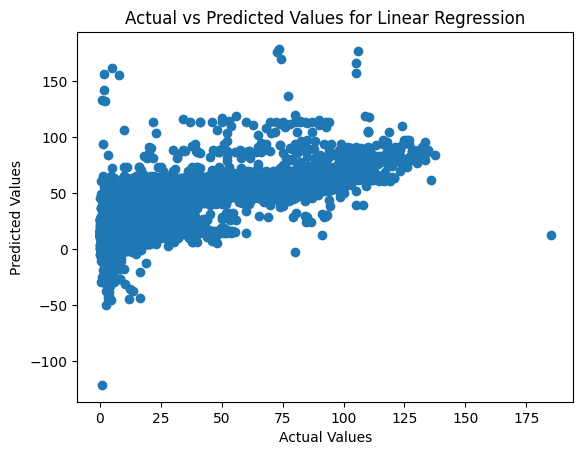

The RMSE for this model is 20.430830667833096
Mean Squared Error: 417.42
R-squared: 0.64


In [ ]:
# Initialize the Linear Regression model and trained it without any hyperparameters
#basic way
model_lin = LinearRegression()

# Train the model on the training set
model_lin.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_lin.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plotting actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Linear Regression')
plt.show()
err=sqrt(mse)
print('The RMSE for this model is',err)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 14.7 MB/s eta 0:00:00


In [ ]:
#training of the more advanced model elastic net with hyperparameter
#use optuna to automatically select the best hyperparameter

import optuna
def objective(trial):
    # Hyperparameters to be optimized
    max_iter = trial.suggest_int('max_iter', 100, 1500)
    alpha = trial.suggest_categorical('alpha', [0.0001, 0.001, 0.01, 0.1, 1, 10, 100])
    l1_ratio = trial.suggest_float('l1_ratio', 0, 1)

    # Model initialization and training
    model1 = ElasticNet(max_iter=max_iter, alpha=alpha, l1_ratio=l1_ratio)
    model1.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model1.predict(X_test)

    # Evaluate the model using Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)

    return mse  # Minimize Mean Squared Error

# Perform hyperparameter optimization(Optuna is used to create a study for the hyperparameter optimization with the objective of minimizing the MSE. The study.optimize function performs the optimization, running the objective function for a specified number of trials (100 in this case).)
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Get the best hyperparameters
best_params = study.best_params
#we can print each best hyperparameterusing the code if you want to see
print(f"Best Hyperparameters: {best_params}")

# Train the model with the best hyperparameters on the full dataset
best_model = ElasticNet(**best_params)
best_model.fit(X_train, y_train)

# Print the evaluation result
best_result = objective(study.best_trial)
print(f"Best Mean Squared Error: {best_result:.2f}")


[I 2025-04-11 16:50:19,898] A new study created in memory with name: no-name-24344906-a477-4e04-9e50-5e8d0136068d
[I 2025-04-11 16:50:20,219] Trial 0 finished with value: 1160.7758747213918 and parameters: {'max_iter': 590, 'alpha': 100, 'l1_ratio': 0.6678719577671369}. Best is trial 0 with value: 1160.7758747213918.
[I 2025-04-11 16:50:20,693] Trial 1 finished with value: 935.2399913985921 and parameters: {'max_iter': 1181, 'alpha': 10, 'l1_ratio': 0.49466203952371157}. Best is trial 1 with value: 935.2399913985921.
[I 2025-04-11 16:50:21,706] Trial 2 finished with value: 418.8918196842283 and parameters: {'max_iter': 621, 'alpha': 0.01, 'l1_ratio': 0.05035035397234755}. Best is trial 2 with value: 418.8918196842283.
[I 2025-04-11 16:50:22,606] Trial 3 finished with value: 417.5183625735251 and parameters: {'max_iter': 890, 'alpha': 0.001, 'l1_ratio': 0.3067920285401551}. Best is trial 3 with value: 417.5183625735251.
[I 2025-04-11 16:50:22,703] Trial 4 finished with value: 1160.77587

Best Hyperparameters: {'max_iter': 1411, 'alpha': 0.01, 'l1_ratio': 0.9999562572489478}
Best Mean Squared Error: 417.33


In [ ]:

# Make predictions on the test set using the best model of elasticnet
y_pred_test = best_model.predict(X_test)

#calculate MSE
MSE_test=mean_squared_error(y_test, y_pred_test)
# Calculate RMSE
rmse_test = np.sqrt(MSE_test)
R2_test=r2_score(y_test, y_pred_test)

print(f"Mean Squared Error on Test Set: {MSE_test:.2f}")
print(f"Root Mean Squared Error on Test Set: {rmse_test:.2f}")
print(f"R2 on Test Set: {R2_test:.2f}")

Mean Squared Error on Test Set: 417.33
Root Mean Squared Error on Test Set: 20.43
R2 on Test Set: 0.64


In [ ]:
import optuna
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Define the objective function for Optuna
def objective(trial):
    # Suggest hyperparameters to tune
    max_depth = trial.suggest_int('max_depth', 3, 70)  # Limit the depth of the tree
    min_samples_split = trial.suggest_int('min_samples_split', 2, 25)  # Minimum samples required to split an internal node
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 25)  # Minimum samples required to be at a leaf node
    criterion = trial.suggest_categorical('criterion', ['squared_error', 'friedman_mse'])  # Choose loss function

    # Create the model
    model = DecisionTreeRegressor(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        criterion=criterion,
        random_state=42
    )

    # Use cross-validation to evaluate the performance
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    return -scores.mean()  # Minimize the negative MSE

# Step 3: Create the Optuna study and optimize
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)  # Increase number of trials for a better parameter search

# Get the best hyperparameters
best_params = study.best_params
print(f"Best Hyperparameters: {best_params}")

# Step 4: Train the final Decision Tree Regressor using the best parameters
best_model = DecisionTreeRegressor(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# Step 5: Evaluate the final model on the test set
y_pred = best_model.predict(X_test)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Best RMSE on test set: {rmse:.4f}")
print(f"Best R² on test set: {r2:.4f}")

[I 2025-04-10 18:51:22,197] A new study created in memory with name: no-name-aa028670-b726-496b-91b9-452426b29f47
[I 2025-04-10 18:51:22,775] Trial 0 finished with value: 131.97450177169029 and parameters: {'max_depth': 63, 'min_samples_split': 9, 'min_samples_leaf': 3, 'criterion': 'squared_error'}. Best is trial 0 with value: 131.97450177169029.
[I 2025-04-10 18:51:23,284] Trial 1 finished with value: 135.1046096829199 and parameters: {'max_depth': 69, 'min_samples_split': 17, 'min_samples_leaf': 9, 'criterion': 'squared_error'}. Best is trial 0 with value: 131.97450177169029.
[I 2025-04-10 18:51:23,869] Trial 2 finished with value: 130.55569770057744 and parameters: {'max_depth': 34, 'min_samples_split': 12, 'min_samples_leaf': 1, 'criterion': 'squared_error'}. Best is trial 2 with value: 130.55569770057744.
[I 2025-04-10 18:51:24,317] Trial 3 finished with value: 153.30391538472583 and parameters: {'max_depth': 45, 'min_samples_split': 11, 'min_samples_leaf': 20, 'criterion': 'frie

Best Hyperparameters: {'max_depth': 31, 'min_samples_split': 12, 'min_samples_leaf': 2, 'criterion': 'squared_error'}
Best RMSE on test set: 11.2990
Best R² on test set: 0.8900


Best RMSE on test set: 9.3540
Best R² on test set: 0.9246


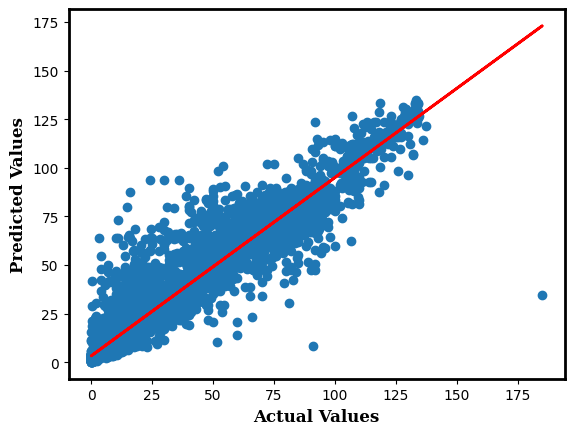

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Step 2: Define the Random Forest Regressor with best hyperparameters
best_params = {
    'n_estimators': 400,  # Number of trees
    'max_depth': 35,      # Maximum depth of trees
    'min_samples_split': 2,  # Minimum samples required to split a node
    'min_samples_leaf': 1,   # Minimum samples required at a leaf node
    'max_features': 'sqrt',  # Number of features to consider for the best split
    'random_state': 42,      # For reproducibility
}

# Step 3: Train the Random Forest Regressor
model_rf = RandomForestRegressor(**best_params)
model_rf.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = model_rf.predict(X_test)

# Step 5: Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print the final results
print(f"Best RMSE on test set: {rmse:.4f}")
print(f"Best R² on test set: {r2:.4f}")


# Plotting actual vs predicted values
#plt.scatter(y_test, y_pred)
#plt.xlabel('Actual Values')
#plt.ylabel('Predicted Values')
#plt.title('Actual vs Predicted Values for Linear Regression')
#regression_line = np.polyfit(y_test, y_pred, 1)
#line = np.polyval(regression_line, y_test)
#plt.plot(y_test, line, color='red', linewidth=2)
#plt.show()

# Your code for plotting
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values', fontdict={'fontsize': 12, 'fontweight': 'bold', 'fontfamily': 'serif'})
plt.ylabel('Predicted Values', fontdict={'fontsize': 12, 'fontweight': 'bold', 'fontfamily': 'serif'})
#plt.title('Actual vs Predicted Values for Linear Regression', fontdict={'fontsize': 14, 'fontweight': 'bold', 'fontfamily': 'serif'})
regression_line = np.polyfit(y_test, y_pred, 1)
line = np.polyval(regression_line, y_test)
plt.plot(y_test, line, color='red', linewidth=2)
# Add figure name at the base
# plt.figtext(0.5, 0.01, 'Actual vs Predicted Values for Linear Regression', ha='center', fontdict={'fontsize': 8, 'fontweight': 'bold', 'fontfamily': 'serif'})
ax = plt.gca()
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

# Save the figure
plt.savefig('actual_vs_predicted__random_regressionc.png', dpi=300)

# Show the plot
plt.show()

In [ ]:

# Define the objective function for decisiontree regressor
def objective(trial):
    # Define hyperparameters to be optimized
    max_depth = trial.suggest_int('max_depth', 2, 32, log=True)
    min_samples_split = trial.suggest_float('min_samples_split', 0.1, 1.0)
    min_samples_leaf = trial.suggest_float('min_samples_leaf', 0.1, 0.5)

    # Initialize the model with hyperparameters
    model = DecisionTreeRegressor(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Compute Mean Squared Error as the objective
    mse = mean_squared_error(y_test, y_pred)

    return mse

# Create a study object and optimize the objective function
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Get the best hyperparameters
best_params = study.best_params
print(f"Best Hyperparameters: {best_params}")

# Train the final model with the best hyperparameters
final_model = DecisionTreeRegressor(**best_params, random_state=42)
final_model.fit(X_train, y_train)
# Print the evaluation result
best_result = objective(study.best_trial)
print(f"Best Mean Squared Error: {best_result:.2f}")


[I 2024-06-19 17:09:28,358] A new study created in memory with name: no-name-887fe565-719a-41db-88bc-df0edac73c68
[I 2024-06-19 17:09:28,391] Trial 0 finished with value: 537.9457499479713 and parameters: {'max_depth': 14, 'min_samples_split': 0.6340291700854919, 'min_samples_leaf': 0.40376452960107845}. Best is trial 0 with value: 537.9457499479713.
[I 2024-06-19 17:09:28,413] Trial 1 finished with value: 472.6237044043505 and parameters: {'max_depth': 2, 'min_samples_split': 0.479431894203351, 'min_samples_leaf': 0.2809753638161228}. Best is trial 1 with value: 472.6237044043505.
[I 2024-06-19 17:09:28,432] Trial 2 finished with value: 472.6237044043505 and parameters: {'max_depth': 25, 'min_samples_split': 0.9294117214551022, 'min_samples_leaf': 0.2035734598631397}. Best is trial 1 with value: 472.6237044043505.
[I 2024-06-19 17:09:28,473] Trial 3 finished with value: 431.1575021859045 and parameters: {'max_depth': 6, 'min_samples_split': 0.31985002647508975, 'min_samples_leaf': 0.1

Best Hyperparameters: {'max_depth': 7, 'min_samples_split': 0.14584616898607197, 'min_samples_leaf': 0.10023881276853264}
Best Mean Squared Error: 361.71


In [ ]:
# Make predictions on the test set using the final model of decisiontree regressor
y_pred_final = final_model.predict(X_test)

# Calculate RMSE
rmse_test_final = np.sqrt(mean_squared_error(y_test, y_pred_final))
r2_test_final = r2_score(y_test, y_pred_final)
print(f"Mean Squared Error on Test Set: {best_result:.2f}")
print(f"Root Mean Squared Error on Test Set: {rmse_test_final:.2f}")

print(f"R2 on Test Set: {r2_test_final:.2f}")

Mean Squared Error on Test Set: 361.71
Root Mean Squared Error on Test Set: 19.02
R2 on Test Set: 0.69


Out-of-sample MSE: 102.21 K
Out-of-sample RMSE: 10.11 K
Out-of-sample R2: 0.91


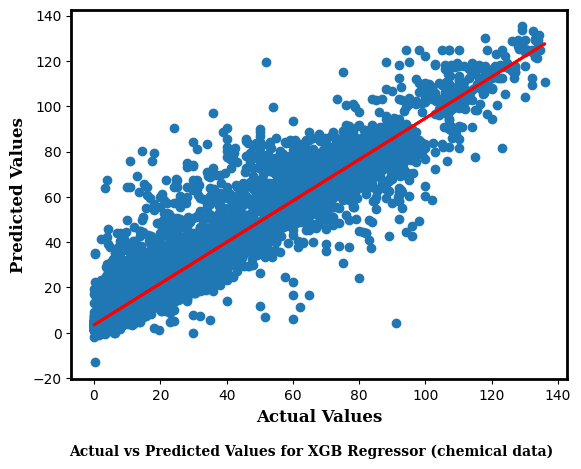

In [ ]:
# Define the XGBoost model
model3 = xgb.XGBRegressor()

# Train the model
model3.fit(X_train, y_train)

# Make predictions on the test set
y_pred3 = model3.predict(X_test)
mse3 = mean_squared_error(y_test, y_pred3)
# Calculate root-mean-squared-error (RMSE)
rmse3 = np.sqrt(mse3)

# Calculate R2 score
r23 = r2_score(y_test, y_pred3)

# Print the results
print(f'Out-of-sample MSE: {mse3:.2f} K')
print(f'Out-of-sample RMSE: {rmse3:.2f} K')
print(f'Out-of-sample R2: {r23:.2f}')


# Your code for plotting
plt.scatter(y_test, y_pred3)
plt.xlabel('Actual Values', fontdict={'fontsize': 12, 'fontweight': 'bold', 'fontfamily': 'serif'})
plt.ylabel('Predicted Values', fontdict={'fontsize': 12, 'fontweight': 'bold', 'fontfamily': 'serif'})
#plt.title('Actual vs Predicted Values for Linear Regression', fontdict={'fontsize': 14, 'fontweight': 'bold', 'fontfamily': 'serif'})
regression_line = np.polyfit(y_test, y_pred3, 1)
line = np.polyval(regression_line, y_test)
plt.plot(y_test, line, color='red', linewidth=2)
# Add figure name at the base
plt.figtext(0.5, -0.05, 'Actual vs Predicted Values for XGB Regressor (chemical data)', ha='center', fontdict={'fontsize': 10, 'fontweight': 'bold', 'fontfamily': 'serif'})
# Adjusting the thickness of the axis lines
ax = plt.gca()
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

# Save the figure
plt.savefig('actual_vs_predicted_XGB_regressionc.png', dpi=300)

Here we train the three models one without using a hyperparameter and another two with hyperparameters. We can evaluate the model performance by different methods, out of which select RMSE. there are aother ways like R2, MSE, MAE etc.


In [ ]:
# Convert the data to DMatrix format, which is the input format for XGBoost
train_data = xgb.DMatrix(X_train, label=y_train)
test_data = xgb.DMatrix(X_test, label=y_test)

# Define parameters for XGBoost model
params = {
    'objective': 'reg:squarederror',  # Regression task with mean squared error
    'max_depth': 22,
    'learning_rate': 0.3,
    'n_estimators': 1000
}

# Train the XGBoost model
model4 = xgb.train(params, train_data, num_boost_round=10)

# Make predictions on the test set
y_pred4 = model4.predict(test_data)

# Calculate and print the mean squared error
mse4 = mean_squared_error(y_test, y_pred4)
r24 = r2_score(y_test, y_pred4)
rmse4=np.sqrt(mse4)
print(f'Mean Squared Error: {mse4:.2f}')
print(f'Root Mean Squared Error: {rmse4:.2f}')
print(f'R2: {r24:.2f}')


Mean Squared Error: 103.42
Root Mean Squared Error: 10.17
R2: 0.91


In [ ]:

# Define the MLP Regressor model
mlp_model = MLPRegressor(hidden_layer_sizes=(100, ), activation='relu', solver='adam', random_state=42)

# Train the model
mlp_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred5 = mlp_model.predict(X_test)

# Calculate root-mean-squared-error (RMSE)
rmse5 = np.sqrt(mean_squared_error(y_test, y_pred5))

# Calculate R2 score
r25 = r2_score(y_test, y_pred5)

# Print the results
print(f'Out-of-sample MSE: {mean_squared_error(y_test, y_pred5):.2f}')
print(f'Out-of-sample RMSE: {rmse5:.2f}')
print(f'Out-of-sample R2: {r25:.2f}')


Out-of-sample MSE: 186.70
Out-of-sample RMSE: 13.66
Out-of-sample R2: 0.84


In [ ]:
import optuna
def objective(trial):
    # Define the MLP Regressor model with suggested hidden layer sizes
    hidden_layers = trial.suggest_categorical("hidden_layer_sizes", [(50, 100), (100, 100), (50, 75, 100), (25, 50, 75, 100)])
    mlp_model = MLPRegressor(hidden_layer_sizes=hidden_layers, activation='relu', solver='adam', random_state=42)

    # Train the model
    mlp_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = mlp_model.predict(X_test)

    # Calculate and return negative R2 score (since Optuna does minimization)
    r2 = r2_score(y_test, y_pred)
    return -r2

# Optimize hyperparameters using Optuna
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

# Get the best hyperparameters
best_params = study.best_params
hidden_layers = best_params["hidden_layer_sizes"]

# Print the best hyperparameters found by Optuna
print('Best Hidden Layer Sizes:', hidden_layers)

# Use the best hyperparameters to train the final model
best_mlp_model = MLPRegressor(hidden_layer_sizes=hidden_layers, activation='relu', solver='adam', random_state=42)
best_mlp_model.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred_best = best_mlp_model.predict(X_test)

# Calculate and print the final out-of-sample R2 score
mse_final= mean_squared_error(y_test, y_pred_best)
RMSE_final = np.sqrt(mse_final)
final_r2 = r2_score(y_test, y_pred_best)
print(f'Final Out-of-sample mse with Best Model: {mse_final:.2f}')
print(f'Final Out-of-sample rmse with Best Model: {RMSE_final:.2f}')
print(f'Final Out-of-sample R2 with Best Model: {final_r2:.2f}')

[I 2024-06-21 15:35:28,424] A new study created in memory with name: no-name-cdeb1bca-8ecf-49d7-9fba-b14b837ddb96
[I 2024-06-21 15:36:21,003] Trial 0 finished with value: -0.8696704271137146 and parameters: {'hidden_layer_sizes': (100, 100)}. Best is trial 0 with value: -0.8696704271137146.
[I 2024-06-21 15:37:20,380] Trial 1 finished with value: -0.8772093310246316 and parameters: {'hidden_layer_sizes': (50, 75, 100)}. Best is trial 1 with value: -0.8772093310246316.
[I 2024-06-21 15:38:12,481] Trial 2 finished with value: -0.8696704271137146 and parameters: {'hidden_layer_sizes': (100, 100)}. Best is trial 1 with value: -0.8772093310246316.
[I 2024-06-21 15:39:17,456] Trial 3 finished with value: -0.8748610352934094 and parameters: {'hidden_layer_sizes': (25, 50, 75, 100)}. Best is trial 1 with value: -0.8772093310246316.
[I 2024-06-21 15:40:22,948] Trial 4 finished with value: -0.8748610352934094 and parameters: {'hidden_layer_sizes': (25, 50, 75, 100)}. Best is trial 1 with value: 

Best Hidden Layer Sizes: (50, 75, 100)
Final Out-of-sample mse with Best Model: 142.52
Final Out-of-sample rmse with Best Model: 11.94
Final Out-of-sample R2 with Best Model: 0.88


In [ ]:
# Your code for plotting
plt.scatter(y_test, y_pred_best)
plt.xlabel('Actual Values', fontdict={'fontsize': 12, 'fontweight': 'bold', 'fontfamily': 'serif'})
plt.ylabel('Predicted Values', fontdict={'fontsize': 12, 'fontweight': 'bold', 'fontfamily': 'serif'})
#plt.title('Actual vs Predicted Values for Linear Regression', fontdict={'fontsize': 14, 'fontweight': 'bold', 'fontfamily': 'serif'})
regression_line = np.polyfit(y_test, y_pred_best, 1)
line = np.polyval(regression_line, y_test)
plt.plot(y_test, line, color='red', linewidth=2)
# Add figure name at the base
plt.figtext(0.5, -0.05, 'Actual vs Predicted Values for MLP Regressor (chemical data)', ha='center', fontdict={'fontsize': 10, 'fontweight': 'bold', 'fontfamily': 'serif'})
# Adjusting the thickness of the axis lines
ax = plt.gca()
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

# Save the figure
plt.savefig('actual_vs_predicted_MLP_regressionc.png')

# Show the plot
plt.show()

NameError: name 'plt' is not defined

XGB turn out to be the best model to predict the critical temperature becuase this one works well irrespective of distribution of the data.
